## Урок 7. Многомерный статистический анализ. Линейная регрессия

#### Задание 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату 
(то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). 
Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110] 
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

n = len(zp)
X = np.array(zp)

y = np.array(ks)

X, y

(array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110]),
 array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]))

In [2]:
b = (np.mean(X * y) - np.mean(X) * np.mean(y)) / (np.mean(X ** 2) - np.mean(X) ** 2)
b

2.620538882402765

In [3]:
b = (n * (np.sum(X *y)) - (np.sum(X) * np.sum(y))) / (n * (np.sum(X ** 2)) - ((np.sum(X) ** 2)))
b

2.6205388824027653

In [4]:
a = np.mean(y) - b * np.mean(X)
a

444.17735732435955

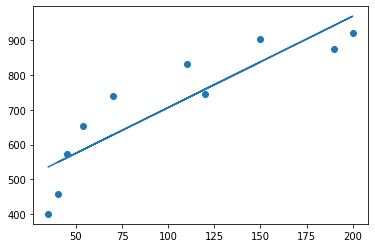

In [5]:
# Проверка

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, y)
plt.plot(X, a + b * X)
plt.show()


In [6]:
X = X.reshape((n, 1))
y = y.reshape((n, 1))

In [7]:
b = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@y)
b #Без интерсепта

array([[5.88982042]])

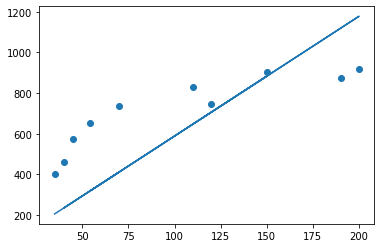

In [8]:
# Проверка

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, y)
plt.plot(X, b * X)
plt.show()


In [9]:
X = np.hstack([np.ones((n, 1)), X])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [10]:
b = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@y)
b #С интерсептом

array([[444.17735732],
       [  2.62053888]])

In [11]:
X[:, 1]

array([ 35.,  45., 190., 200.,  40.,  70.,  54., 150., 120., 110.])

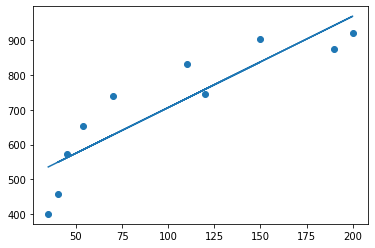

In [12]:
# Проверка

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], np.dot(X, b))
plt.show()


#### Задание 2
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [13]:
X = np.array(zp)
y = np.array(ks)
alpha = 1e-6

def mse(B1, y=y, X=X, n=n):
    return np.sum((B1 * X - y) ** 2) / n

In [14]:
B1 = 0.1

for i in range(1000):
    B1 -= alpha * (2/n) * np.sum((B1 * X - y) * X)
    if i % 100 == 0:
        print(f'Iteration {i}, {B1=}, mse={mse(B1)}')

Iteration 0, B1=0.25952808, mse=493237.7212546963
Iteration 100, B1=5.54537842245223, mse=58151.31823171113
Iteration 200, B1=5.868748638669329, mse=56522.97550129376
Iteration 300, B1=5.888531320728348, mse=56516.88130936019
Iteration 400, B1=5.8897415574471985, mse=56516.85850140053
Iteration 500, B1=5.889815595583751, mse=56516.858416040064
Iteration 600, B1=5.889820124983314, mse=56516.85841572062
Iteration 700, B1=5.889820402076462, mse=56516.85841571941
Iteration 800, B1=5.88982041902807, mse=56516.8584157194
Iteration 900, B1=5.889820420065112, mse=56516.85841571941
